# Classification Model:


## Predict the intention (make a purchase or not) of e-commerce website visitors.

In [ ]:
# The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong 
#to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 
#Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, 
#and the rest (1908) were positive class samples ending with shopping.


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_csv(r"C:\Users\HP PAV15\Desktop\datasets\online_shoppers_intention.csv")
dataset.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [47]:
#The main goal of this project is to design a machine learning classification system, 
#that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

In [48]:
#Numerical Features:

#Admin: pages visited by the visitor about account management
#Ad. duration: seconds spent by the visitor on account management related pages
#Info.: informational pages visited by the visitor
#Info. durat.: seconds spent by the visitor on informational pages
#Prod.: pages visited by visitor about product related pages
#Prod.durat.: seconds spent by the visitor on product related pages
#Bounce rate: Average bounce rate value of the pages visited by the visitor
#Exit rate: Average exit rate value of the pages visited by the visitor
#Page value : Average page value of the pages visited by the visitor
#Special day: Closeness of the site visiting time to a special day

In [49]:
#Categorical Features:

#OperatingSystems: Operating system of the visitor
#Browser: Browser of the visitor
#Region: Geographic region from which the session has been started by the visitor
#TrafficType: Traffic source (e.g., banner, SMS, direct)
#VisitorType: Visitor type as “New Visitor,” “Returning Visitor,” and “Other”
#Weekend: Boolean value indicating whether the date of the visit is weekend
#Month: Month value of the visit date
#Revenue: Class label: whether the visit has been finalized with a transaction

# Data Preprocessing & Visualization:

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12321 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [51]:
print(dataset.isnull().sum())

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   9
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     5
Revenue                    12
dtype: int64


In [52]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12321.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043059,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048586,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [53]:
dataset['ExitRates'].fillna(dataset['ExitRates'].median(), inplace = True)
dataset['Weekend'].fillna(dataset['Weekend'].mode()[0],inplace =True)
dataset['Revenue'].fillna(dataset['Revenue'].mode()[0],inplace = True)

In [54]:
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [55]:
#We will transform Revenue & Weekend features from boolean into binary, so that we can easily use them in our later calculations.
dataset.Revenue = dataset.Revenue.astype('int')
dataset.Weekend = dataset.Weekend.astype('int')
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


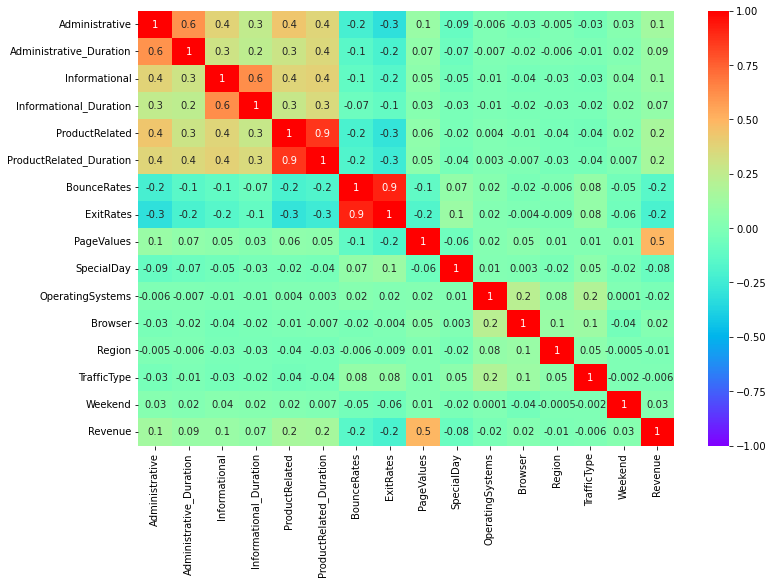

In [56]:
#For Numerical Purpose
matrix = np.triu(dataset.corr())
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap='rainbow')
plt.show()

In [58]:
#Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
#Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page.
#e average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website.
#Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase.

In [ ]:
#For categorical data we'll use graphs to show its impact on the Revenue.

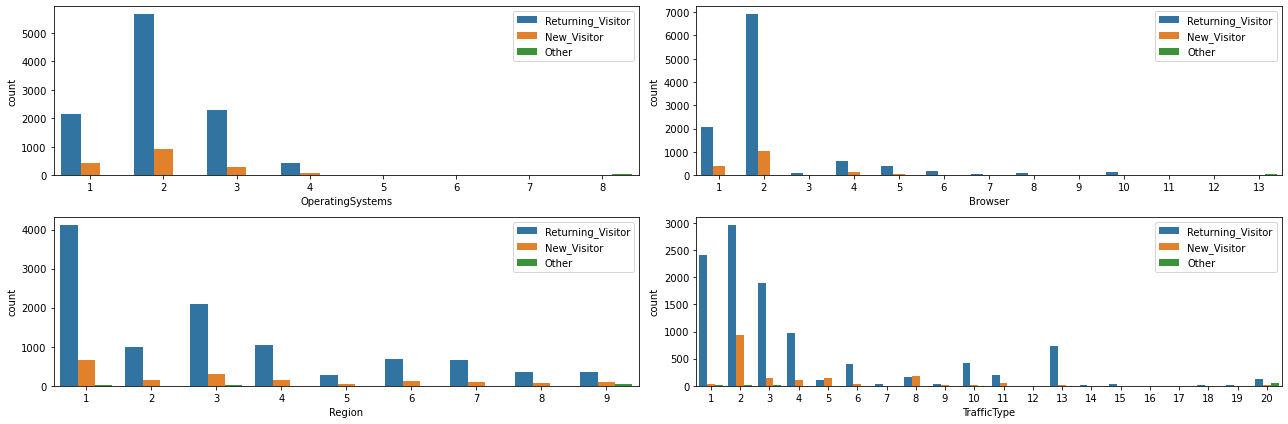

In [63]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=dataset, x='OperatingSystems', hue='VisitorType', ax=ax1)   #type of visitor
sns.countplot(data=dataset, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=dataset, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=dataset, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

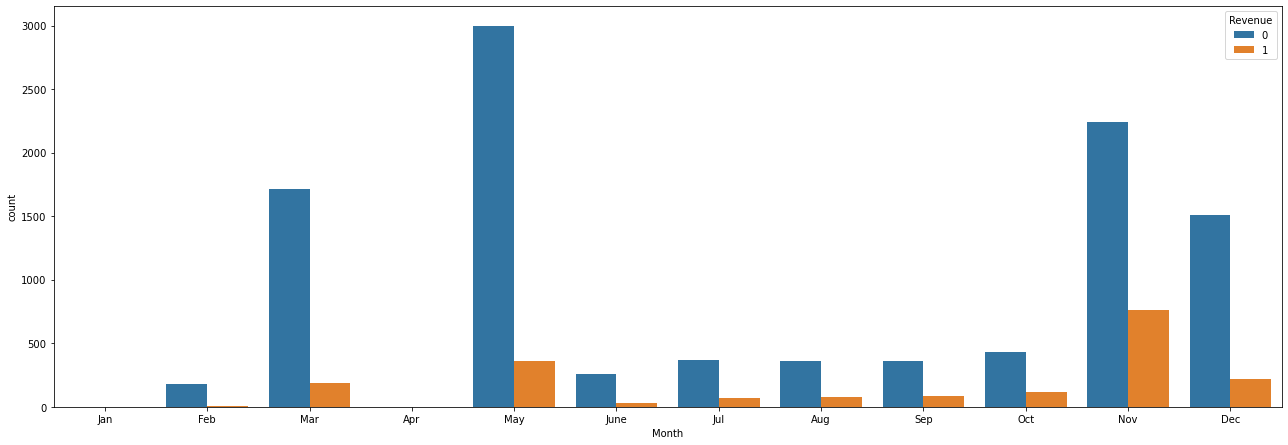

In [65]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)


orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=dataset, x='Month', hue='Revenue', ax=ax1, order=orderlist)


plt.tight_layout()
plt.show()

In [40]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Month'])], axis=1).drop(['Month'],axis=1)
dataset = pd.concat([dataset,pd.get_dummies(dataset['VisitorType'])], axis=1).drop(['VisitorType'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

# Model Analysis:

In [41]:
X = dataset.drop(['Revenue'], axis=1)
y = dataset['Revenue']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val_set, y_train, y_val_set = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_set, y_val_set, test_size=0.5, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(8631, 28)
(1850, 28)
(1849, 28)


In [ ]:
#so training set got 70% of data while test and validation set got 15% data each.

In [47]:
from sklearn.preprocessing import StandardScaler
std_X = StandardScaler()

Xsc_train = std_X.fit_transform(X_train)
Xsc_val = std_X.fit_transform(X_val)
Xsc_test = std_X.fit_transform(X_test)

## Logistic Regression:

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# predicting the  test set results
y_pred = log_reg.predict(X_val)
print(y_pred)

# finding the mean squared error and variance
#mse = mean_squared_error(y_test, y_pred)
#print('RMSE :', np.sqrt(mse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

[0 0 0 ... 0 0 0]


I:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_pred)

array([[1496,   47],
       [ 181,  125]], dtype=int64)

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
print ('the accuracy of the model is:', cross_val_score(log_reg, X_train, y_train ,cv =3))  
print('the recall score is ;' ,recall_score(y_val, y_pred))
print('the precision score is :', precision_score(y_val, y_pred))
print('the F1 score is :',f1_score(y_val, y_pred))


I:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
I:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

the accuracy of the model is: [0.88355926 0.88251651 0.87625999]
the recall score is ; 0.4084967320261438
the precision score is : 0.7267441860465116
the F1 score is : 0.5230125523012552


I:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using SVM Model:

In [124]:

from sklearn.svm import SVC    #kernel trick
svm = SVC(C=1.0,kernel='rbf',degree=3) #default values
svm.fit(Xsc_train,y_train)  #because svm is sensitive to feature scaling 
svm_pred_1 = svm.predict(Xsc_val)

In [125]:
svm_2= SVC(C=1.0,kernel='linear')
svm.fit(Xsc_train,y_train)  #because svm is sensitive to feature scaling 
svm_pred_2 = svm.predict(Xsc_val)

In [126]:
svm_3= SVC(C=1.0,kernel='poly',degree=3)
svm.fit(Xsc_train,y_train)  #because svm is sensitive to feature scaling 
svm_pred_3 = svm.predict(Xsc_val)

In [127]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix with kernel rbf is:')
confusion_matrix(y_val,svm_pred_1)
      

Confusion matrix with kernel rbf is:


array([[1494,   49],
       [ 161,  145]], dtype=int64)

In [128]:
print('Confusion matrix with kernel linear is:')
confusion_matrix(y_val,svm_pred_2)

Confusion matrix with kernel linear is:


array([[1494,   49],
       [ 161,  145]], dtype=int64)

In [129]:
print('Confusion matrix with kernel poly is:')
confusion_matrix(y_val,svm_pred_3)

Confusion matrix with kernel poly is:


array([[1494,   49],
       [ 161,  145]], dtype=int64)

In [130]:
print ('the accuracy of the model is:', cross_val_score(svm_3, Xsc_train, y_train ,cv =3))  
print('the recall score is ;' ,recall_score(y_val, svm_pred_3))
print('the precision score is :', precision_score(y_val, svm_pred_3))
print('the F1 score is :',f1_score(y_val, svm_pred_3))

the accuracy of the model is: [0.88077859 0.87695516 0.87904067]
the recall score is ; 0.4738562091503268
the precision score is : 0.7474226804123711
the F1 score is : 0.58


## Random Forest Classifier:

In [133]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier() 
rnd_clf.fit(X_train,y_train)
rnd_clf_pred = rnd_clf.predict(X_val)

In [134]:
print('Confusion matrix is:')
confusion_matrix(y_val,rnd_clf_pred)

Confusion matrix is:


array([[1486,   57],
       [ 131,  175]], dtype=int64)

In [135]:
print ('the accuracy of the model is:', cross_val_score(rnd_clf, X_train, y_train ,cv =3))  
print('the recall score is ;' ,recall_score(y_val, rnd_clf_pred))
print('the precision score is :', precision_score(y_val, rnd_clf_pred))
print('the F1 score is :',f1_score(y_val, rnd_clf_pred))

the accuracy of the model is: [0.89920056 0.89572471 0.89920056]
the recall score is ; 0.5718954248366013
the precision score is : 0.7543103448275862
the F1 score is : 0.6505576208178439


# Result

## From the above models it is clear that the accuracy and F1 score is best for Random Forest Classifier, hence we'll use this model for our classification task.
#We'll first try this model on our test set & use it for future predictions.

In [ ]:
# rnd_clf = RandomForestClassifier() 
rnd_clf.fit(X_train,y_train)
final_pred= rnd_clf.predict(X_test)

In [139]:
print('Confusion matrix is:')
confusion_matrix(y_test, final_pred)


Confusion matrix is:


array([[1535,   53],
       [ 108,  154]], dtype=int64)

In [141]:
print ('the accuracy of the model is:', cross_val_score(rnd_clf, X_train, y_train ,cv =3))  
print('the recall score is ;' ,recall_score(y_test, final_pred))
print('the precision score is :', precision_score(y_test, final_pred))
print('the F1 score is :',f1_score(y_test, final_pred))

the accuracy of the model is: [0.89920056 0.90024331 0.89676747]
the recall score is ; 0.5877862595419847
the precision score is : 0.7439613526570048
the F1 score is : 0.6567164179104478
